Observable Trends:
1) Tweet sentiment analsys tends to show a scatter for each selected agency from positive to negate, where each agency exists in both territories.

2) Of the sentiment analysis, the BBC tends to show the most bias towards a poor sentiment analysis, followed by a close tie between CBS News and the New York Times.

3) Fox News and CNN show the most positive sentiment analysis results. This could indicate, where both organizations tend to lean in opposite political directions, that viewership is potentially near equally mixed on the political spectrum.

In [19]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Account
target_user = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None

# gather the tweets and run vader on them
for target in target_user:
    # create counter
    counter = 1

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []

    # Variable for max_id
    oldest_tweet = None

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
                
        # Get all tweets from home feed
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)
        #print(target_user)
        #print()
        #print(public_tweets)

        # Loop through all tweets 
        for tweet in public_tweets:
            # Print Tweets
            #print("Tweet {counter}: {tweet["text"]})
        
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            #print(results)
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago.append(counter)
            counter += 1
 
        
            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
        
            # Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"],
                               "Agency": target,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})


In [4]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head(300)

,Agency,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,@BBCWorld,0.0000,Tue Oct 02 02:30:05 +0000 2018,1.000,0.000,0.000,2
1,@BBCWorld,0.0000,Mon Oct 01 23:56:42 +0000 2018,1.000,0.000,0.000,3
2,@BBCWorld,-0.6249,Mon Oct 01 23:14:48 +0000 2018,0.661,0.339,0.000,4
3,@BBCWorld,-0.5423,Mon Oct 01 21:48:40 +0000 2018,0.632,0.368,0.000,5
4,@BBCWorld,-0.3182,Mon Oct 01 21:37:12 +0000 2018,0.685,0.315,0.000,6
5,@BBCWorld,0.0000,Mon Oct 01 21:33:25 +0000 2018,1.000,0.000,0.000,7
6,@BBCWorld,0.0000,Mon Oct 01 19:45:07 +0000 2018,1.000,0.000,0.000,8
7,@BBCWorld,-0.6908,Mon Oct 01 19:31:39 +0000 2018,0.701,0.299,0.000,9
8,@BBCWorld,-0.8020,Mon Oct 01 18:57:30 +0000 2018,0.745,0.255,0.000,10
9,@BBCWorld,0.4588,Mon Oct 01 18:35:49 +0000 2018,0.870,0.000,0.130,11


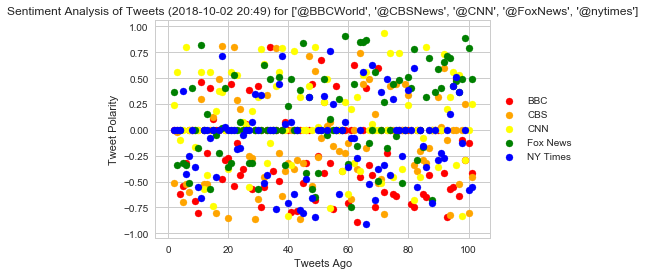

In [29]:
# Create plot
bbc_compound_df = sentiments_pd.loc[sentiments_pd['Agency'] == '@BBCWorld']
plt.scatter(bbc_compound_df['Tweets Ago'], bbc_compound_df['Compound'], label='BBC', color='red')

cbs_compound_df = sentiments_pd.loc[sentiments_pd['Agency'] == '@CBSNews']
plt.scatter(cbs_compound_df['Tweets Ago'], cbs_compound_df['Compound'], label='CBS', color='orange')

cnn_compound_df = sentiments_pd.loc[sentiments_pd['Agency'] == '@CNN']
plt.scatter(cnn_compound_df['Tweets Ago'], cnn_compound_df['Compound'], label='CNN', color='yellow')

foxnews_compound_df = sentiments_pd.loc[sentiments_pd['Agency'] == '@FoxNews']
plt.scatter(foxnews_compound_df['Tweets Ago'], foxnews_compound_df['Compound'], label='Fox News', color='green')

nytimes_compound_df = sentiments_pd.loc[sentiments_pd['Agency'] == '@nytimes']
plt.scatter(nytimes_compound_df['Tweets Ago'], nytimes_compound_df['Compound'], label='NY Times', color='blue')

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
#plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.savefig('CompoundSentimentTweetAnalysis.png')
plt.show()

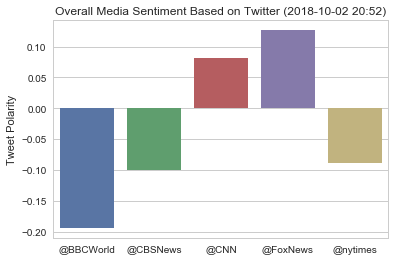

In [30]:
# # create the dataframe
avg_df = pd.DataFrame.from_dict(sentiments)

NewsResults = []
for x in target_user:
    Media_df = avg_df[avg_df["Agency"] == x].mean()
    NewsResults.append(Media_df["Compound"])

users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

sns.set(style="whitegrid")
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Media Sentiment Based on Twitter ({now})")
plt.ylabel("Tweet Polarity")
ax = sns.barplot(x=users, y=NewsResults, palette="deep")
plt.savefig('OverallMediaSentimentAnalysis.png')

#save twitter analysis to CSV
sentiments_pd.to_csv('Twitter_MediaSentimentAnalysis.csv')